In [20]:
#Importing Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
#importing the dataset
dataset=pd.read_csv("C:/Users/ravit/OneDrive/Desktop/Jupyter notebooks/insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#checking for missing values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### EDA

In [6]:
#Age
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0, 0.5, 'charges')

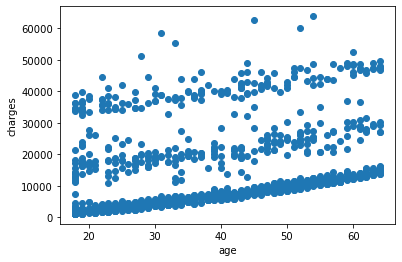

In [7]:
plt.scatter(dataset['age'],dataset['charges'])
plt.xlabel('age')
plt.ylabel('charges')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

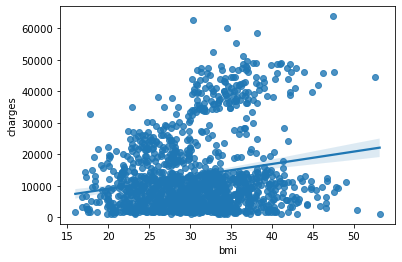

In [8]:
sns.regplot(data=dataset,x='bmi',y='charges')

In [9]:
#splitting the dataset into Train and test set
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [10]:
print(X)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [11]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [12]:
#Encoding Categorical variables
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,4,5])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [14]:
X_train

array([[1.0, 0.0, 1.0, ..., 21, 16.815, 1],
       [0.0, 1.0, 1.0, ..., 28, 38.06, 0],
       [0.0, 1.0, 1.0, ..., 57, 43.7, 1],
       ...,
       [1.0, 0.0, 1.0, ..., 51, 25.8, 1],
       [0.0, 1.0, 1.0, ..., 42, 34.1, 0],
       [0.0, 1.0, 1.0, ..., 44, 34.32, 1]], dtype=object)

In [15]:
y_train

array([ 3167.45585,  2689.4954 , 11576.13   , 16586.49771,  6746.7425 ,
        5976.8311 ,  5649.715  , 15161.5344 ,  2007.945  , 19214.70553,
       16455.70785, 10594.50155, 27117.99378,  4296.2712 ,  7151.092  ,
        8410.04685, 22331.5668 , 37165.1638 , 17468.9839 ,  2494.022  ,
        6356.2707 , 11305.93455, 12235.8392 , 14256.1928 , 13822.803  ,
        7173.35995,  9140.951  ,  1711.0268 ,  5926.846  , 32108.66282,
       17942.106  , 43896.3763 ,  8671.19125,  6112.35295, 15019.76005,
       11365.952  ,  2709.24395, 43254.41795,  1263.249  ,  3757.8448 ,
       20420.60465,  2302.3    , 11658.11505, 11394.06555,  1967.0227 ,
        3353.4703 , 10269.46   , 18963.17192, 31620.00106, 30259.99556,
        6571.544  ,  1632.56445,  2755.02095,  5934.3798 , 14319.031  ,
       19964.7463 ,  6849.026  ,  2498.4144 ,  1631.6683 ,  3766.8838 ,
        9625.92   ,  3309.7926 , 37079.372  , 15359.1045 , 36124.5737 ,
        2842.76075,  1622.1885 , 46599.1084 ,  6948.7008 ,  4500

In [17]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

In [18]:
X_test=sc.transform(X_test)

In [19]:
X_train

array([[ 1.00428267, -1.00428267,  0.50966434, ..., -1.281397  ,
        -2.25446088, -0.05768565],
       [-0.99573559,  0.99573559,  0.50966434, ..., -0.78892204,
         1.16015992, -0.88835894],
       [-0.99573559,  0.99573559,  0.50966434, ...,  1.25133137,
         2.06665375, -0.05768565],
       ...,
       [ 1.00428267, -1.00428267,  0.50966434, ...,  0.82920998,
        -0.81033907, -0.05768565],
       [-0.99573559,  0.99573559,  0.50966434, ...,  0.19602788,
         0.52368553, -0.88835894],
       [-0.99573559,  0.99573559,  0.50966434, ...,  0.33673502,
         0.55904522, -0.05768565]])

In [22]:
#Training the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
predict=model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [29]:
predict

array([ 8.44214570e+03,  6.01814570e+03,  1.54341457e+04,  1.11141457e+04,
        3.84214570e+03,  9.46614570e+03,  9.73814570e+03,  2.59141457e+04,
        7.47414570e+03,  3.10501457e+04,  2.18614570e+03,  3.84214570e+03,
        7.42614570e+03,  1.12261457e+04,  1.27941457e+04,  1.13941457e+04,
        5.25014570e+03,  1.86981457e+04,  1.06101457e+04,  3.13541457e+04,
        3.45861457e+04,  4.32214570e+03,  8.66145701e+02,  7.13014570e+03,
        4.08214570e+03,  1.36981457e+04,  1.20581457e+04,  1.07781457e+04,
        6.26614570e+03,  3.15381457e+04, -1.80585430e+03,  3.45621457e+04,
        9.16214570e+03,  7.59414570e+03,  8.00214570e+03,  1.17621457e+04,
        1.40181457e+04,  1.27861457e+04,  9.73014570e+03,  8.73014570e+03,
        1.57221457e+04,  1.04741457e+04,  5.63414570e+03,  1.12981457e+04,
        5.22614570e+03,  7.07414570e+03,  6.71414570e+03,  3.48261457e+04,
        1.12021457e+04,  1.09141457e+04,  3.29221457e+04,  5.09814570e+03,
        1.05381457e+04,  

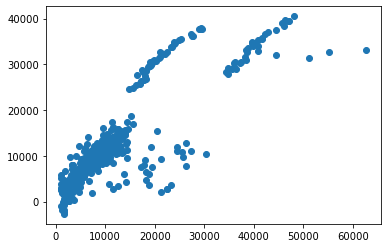

In [30]:
plt.scatter(y_test,predict)

In [31]:
##residuals
residuals=y_test-predict

In [32]:
residuals

array([-1.16064010e+03, -7.50327551e+02, -3.08697370e+03,  1.33989456e+04,
       -1.05681001e+02, -2.10797005e+03,  5.07201991e+01, -8.82887810e+03,
        7.36954499e+02, -1.12520912e+04,  8.90949799e+02, -4.56746551e+02,
       -5.88777001e+02, -2.68785725e+03,  1.35981146e+04,  1.61806295e+03,
       -2.02302460e+03, -3.52807670e+03,  4.63030299e+02, -1.05805180e+04,
        4.97034880e+03, -2.18724420e+03,  1.33204415e+03, -5.75075351e+02,
        2.58295199e+02, -1.07596620e+03, -4.31780870e+03,  1.69720560e+03,
       -2.27821970e+03, -1.04559857e+04,  3.04741930e+03,  5.54174430e+03,
        8.76715767e+03,  7.08389949e+02, -4.53073610e+03, -5.91522810e+03,
       -6.66045901e+02, -3.64158070e+03,  1.59264296e+04, -1.00329170e+03,
       -1.83417720e+03,  1.98104972e+04, -3.67780101e+02,  1.49906392e+03,
       -4.07934910e+03, -2.74235009e+01,  1.91339540e+03,  4.77126150e+03,
        1.12179030e+03,  5.39875799e+02,  7.98205380e+03, -1.92653080e+03,
       -3.09222770e+03, -

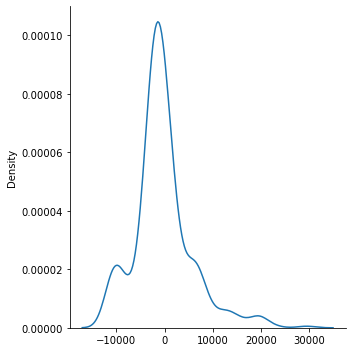

In [33]:
#plotting the residuals
sns.displot(residuals, kind='kde')

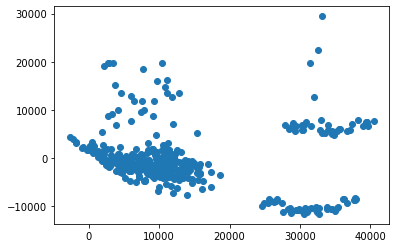

In [34]:
#scatter plot w.r.t prediction and residuals
plt.scatter(predict,residuals)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,predict))
print(mean_squared_error(y_test,predict))
print(np.sqrt(mean_squared_error(y_test,predict)))

4215.868906118622
36797764.86529978
6066.116126921721


In [36]:
#R2 and adjusted R2
from sklearn.metrics import r2_score
score=r2_score(y_test,predict)
print(score)

0.7166304862097013


In [37]:
#adjusted R2 score
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[-1]-1)

0.708638012743821

In [48]:
#making new prediction
dataset.head(1).reshape(1,-1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [49]:
#Pickling the file for deployment
import pickle

In [50]:
pickle.dump(model,open('regmodel.pkl'),'wb')

FileNotFoundError: [Errno 2] No such file or directory: 'regmodel.pkl'